# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* *year*: 2016 para todos los registros.
* *month*: número del mes del año.
* *day*: número del día del año.
* *week*: día de la semana (cadena de caracteres).
* *temp_2*: temperatura máxima 2 días antes.
* *temp_1*: temperatura máxima 1 día antes.
* *average*: medición de temperatura máxima media histórica.
* *actual*: medición d ela temperatura máxima.
* *friend*: la predicción de tu amigo, un número aleatorio entre 20 por debajo del promedio y 20 por encima del promedio (*average* $\pm$ 20).


### 1. Importa el csv "temps.csv"

In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/temps.csv")

In [3]:
data.head(20)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
5,2016,1,6,Wed,40,44,46.1,51,43,49,48,40
6,2016,1,7,Thurs,44,51,46.2,45,45,49,46,38
7,2016,1,8,Fri,51,45,46.3,48,43,47,46,34
8,2016,1,9,Sat,45,48,46.4,50,46,50,45,47
9,2016,1,10,Sun,48,50,46.5,52,45,48,48,49


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


### 2. Trabaja las variables categóricas del dataset

In [11]:
y = data['actual']
y

0      45
1      44
2      41
3      40
4      44
       ..
343    47
344    48
345    48
346    57
347    40
Name: actual, Length: 348, dtype: int64

In [12]:
X = data.drop('actual', axis=1).iloc[:,4:10]
X

,temp_2,temp_1,average,forecast_noaa,forecast_acc,forecast_under
0,45,45,45.6,43,50,44
1,44,45,45.7,41,50,44
2,45,44,45.8,43,46,47
3,44,41,45.9,44,48,46
4,41,40,46.0,46,46,46
...,...,...,...,...,...,...
343,42,42,45.2,41,50,47
344,42,47,45.3,41,49,44
345,47,48,45.3,43,50,45
346,48,48,45.4,44,46,44


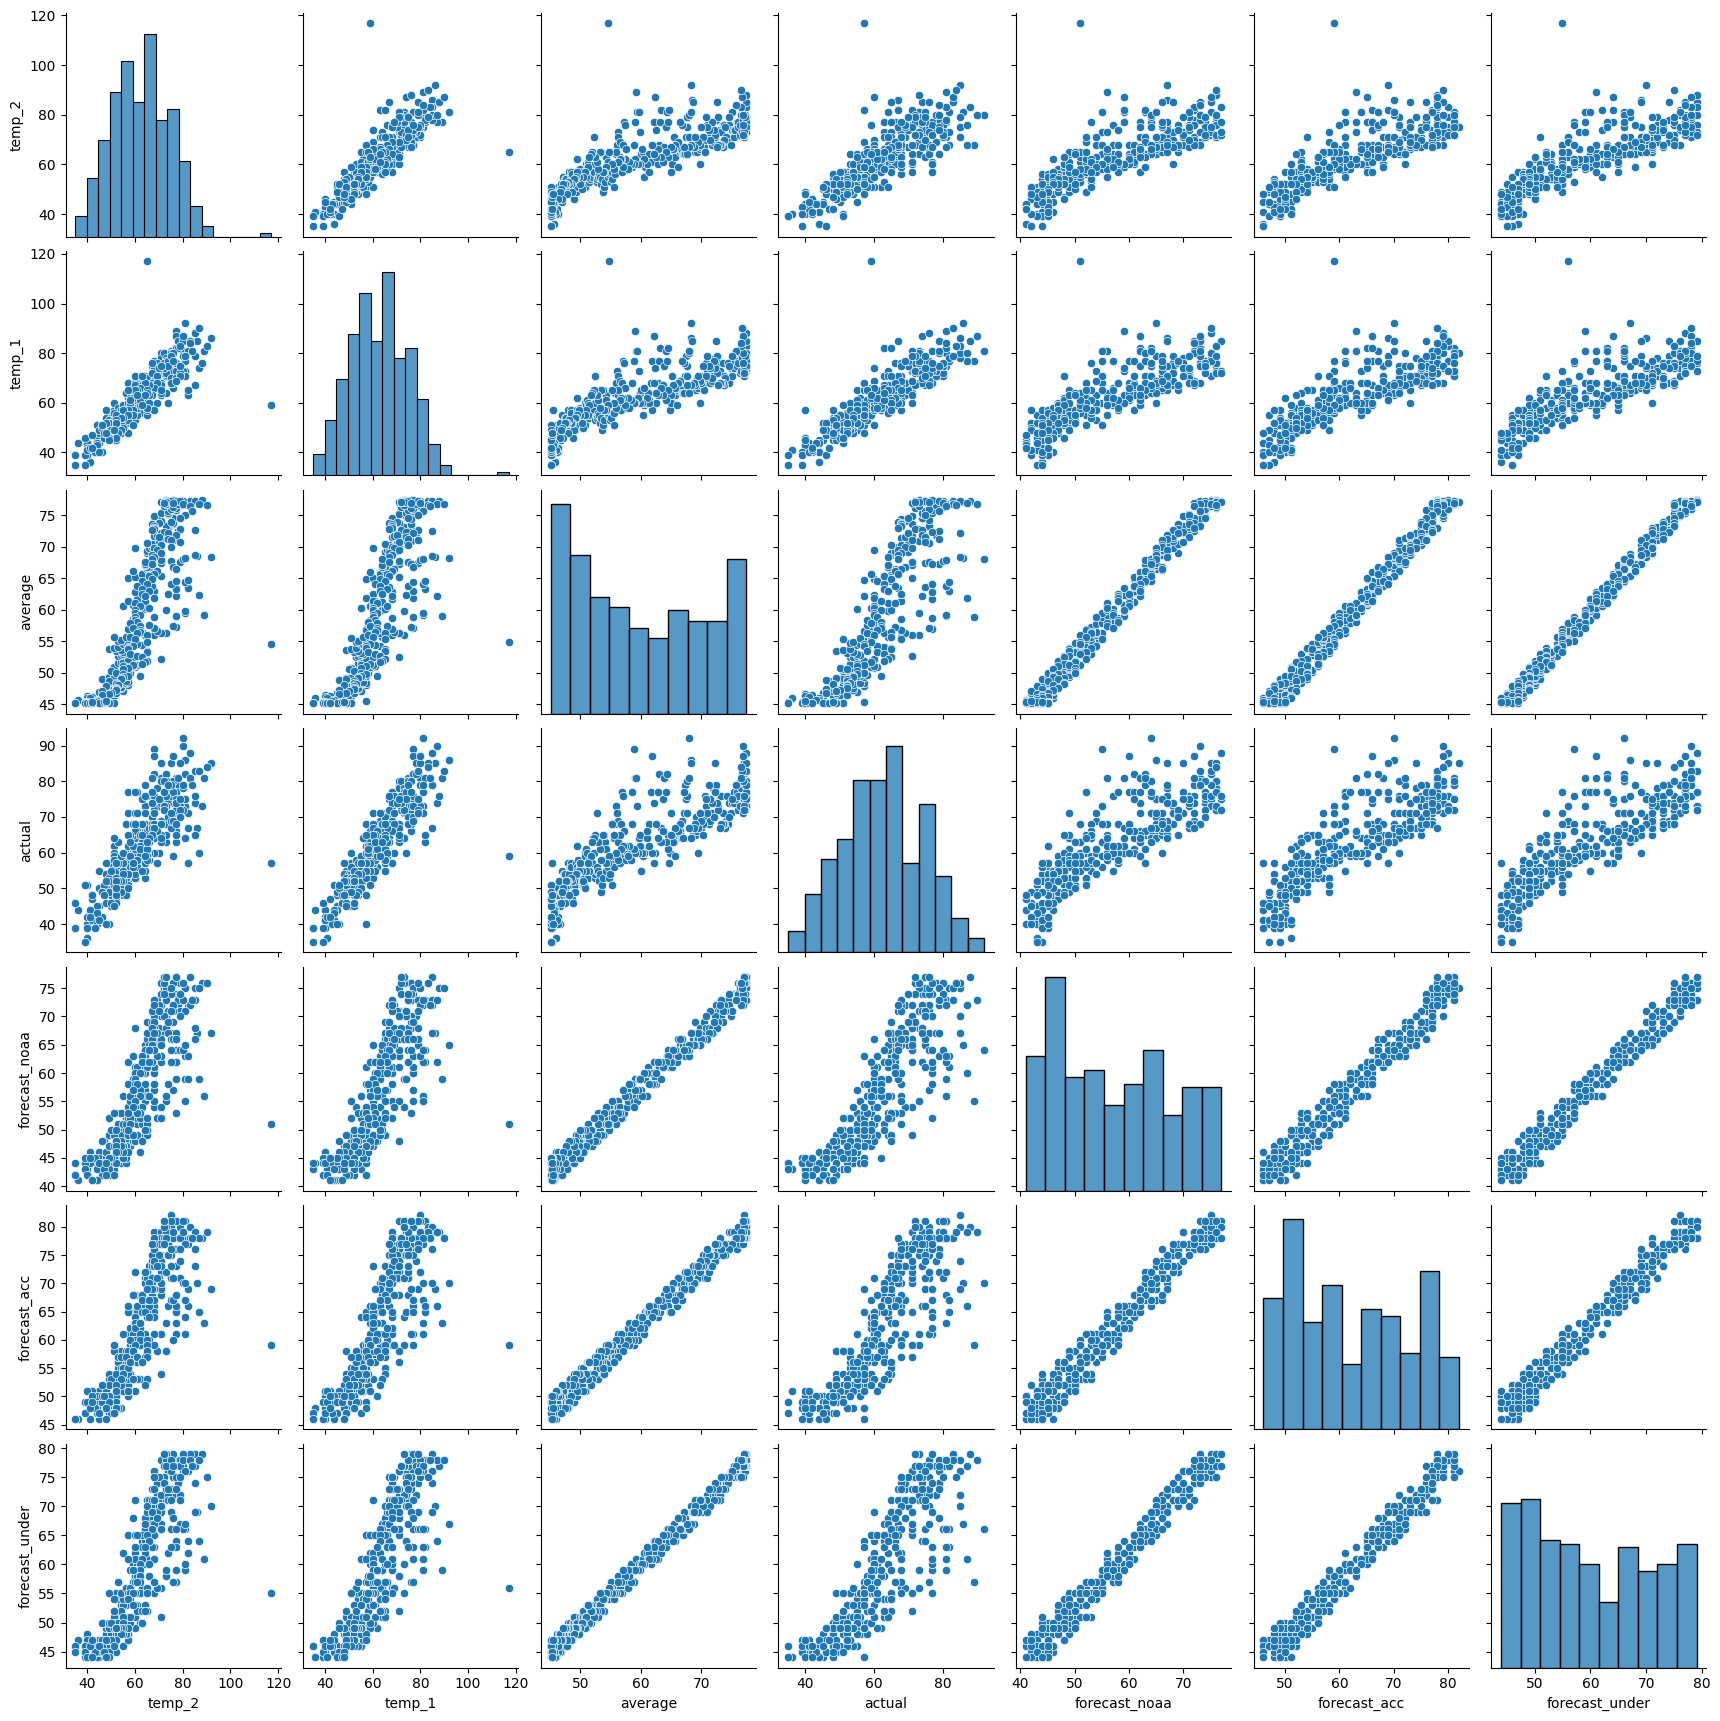

In [13]:
sns.pairplot(data.iloc[:,4:11])

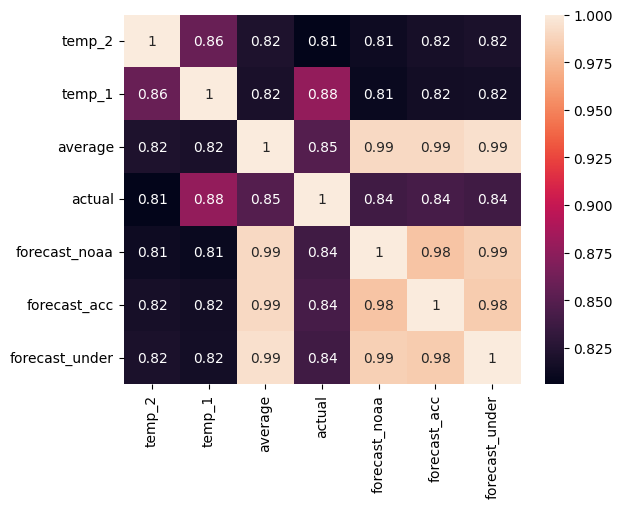

In [14]:
sns.heatmap(data.iloc[:,4:11].corr(numeric_only=True), annot=True);

### 3. Divide en train y test

In [17]:
#Dado por David.
X = data[['temp_1', 'average', 'forecast_noaa']]
X

,temp_1,average,forecast_noaa
0,45,45.6,43
1,45,45.7,41
2,44,45.8,43
3,41,45.9,44
4,40,46.0,46
...,...,...,...
343,42,45.2,41
344,47,45.3,41
345,48,45.3,43
346,48,45.4,44


In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2,
                                                   random_state=22)

In [18]:
print("Train size:", x_train.shape, y_train.shape)
print("Test size:", x_test.shape, y_test.shape)

Train size: (278, 3) (278,)
Test size: (70, 3) (70,)


### 4. Entrena el modelo


In [20]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=22)
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=22)

In [22]:
tree_reg.score(x_train, y_train)

1.0

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [26]:
from sklearn import metrics

predictions = tree_reg.predict(x_test)

print(tree_reg.score(x_test,y_test))
print('R2:', metrics.r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

0.7347042828008158
R2: 0.7347042828008158
MAE: 5.485714285714286
MAPE: 0.0926850501829183
MSE: 44.6
RMSE: 6.6783231428256


### 6. Representa el árbol de decision

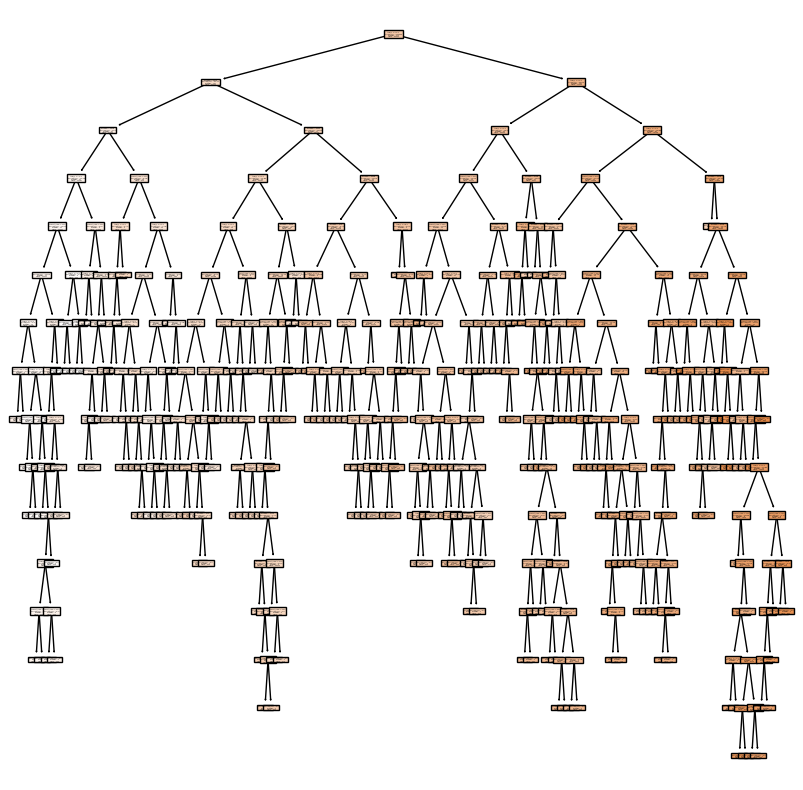

In [27]:
plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(tree_reg,
               feature_names=list(X),
               filled = True);


### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [28]:
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=22)
tree_reg2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=22)

In [29]:
tree_reg2.score(x_train, y_train)

0.8327314891525934

### 8. Vuelve a evaluar tu modelo

In [32]:
predictions2 = tree_reg2.predict(x_test)

print(tree_reg2.score(x_test,y_test)) #R2:
print('R2:', metrics.r2_score(y_test, predictions2))
print('MAE:', metrics.mean_absolute_error(y_test, predictions2))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions2))
print('MSE:', metrics.mean_squared_error(y_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

0.8479756861313648
R2: 0.8479756861313648
MAE: 4.068825262998651
MAPE: 0.07062836716480747
MSE: 25.55745893723
RMSE: 5.05543855043556


### 9. Vuelve a representar su árbol

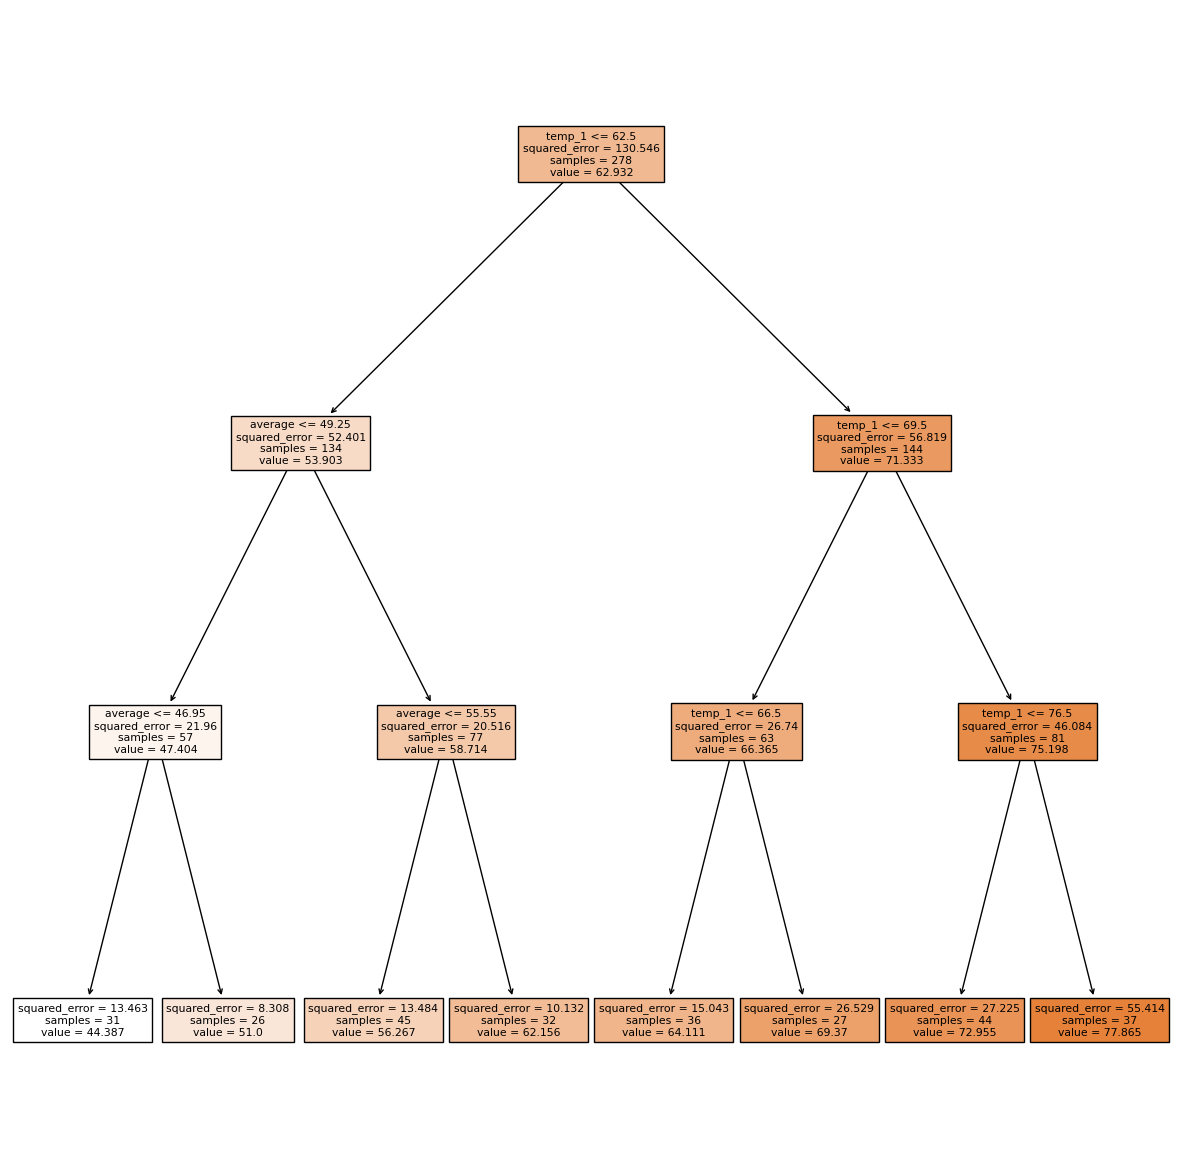

In [31]:
plt.figure(figsize=(15,15))
sklearn.tree.plot_tree(tree_reg2,
               feature_names=list(X),
               filled = True);

### 10. Utiliza un grid search con cross validation.

In [78]:
from sklearn.model_selection import GridSearchCV

tree_reg3 = DecisionTreeRegressor(random_state=22)

parameters = {"max_depth": np.arange(2,11,1),
              "criterion": ["squared_error", "absolute_error"],
              "min_samples_split": [2,5,10,15],
              "min_samples_leaf": [2,4,6,8,10],
              "max_features": [1,2,3,4]}

tree_reg_gs = GridSearchCV(tree_reg3, parameters, cv=5, scoring='neg_mean_absolute_error') #neg porque el algoritmo siempre busca maximizar.

tree_reg_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=22),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='neg_mean_absolute_error')

In [63]:
tree_reg_gs.best_estimator_

DecisionTreeRegressor(max_depth=6, max_features=3, min_samples_leaf=8,
                      random_state=22)

In [64]:
tree_reg_gs.best_score_

-3.8274035121444214

In [65]:
tree_reg_gs.best_params_

{'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': 3,
 'min_samples_leaf': 8,
 'min_samples_split': 2}

### 11. Obten el `feature_importances` de cada variable en el último modelo

In [70]:
tree_reg2.feature_importances_

array([0.81941956, 0.18058044, 0.        ])

In [69]:
pd.DataFrame(tree_reg2.feature_importances_, index=X.columns)

,0
temp_1,0.81942
average,0.18058
forecast_noaa,0.00000


### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [53]:
y_clas = y.apply(lambda x: 'good' if x > 59 else 'bad')
y_clas


0      bad
1      bad
2      bad
3      bad
4      bad
      ... 
343    bad
344    bad
345    bad
346    bad
347    bad
Name: actual, Length: 348, dtype: object

In [54]:
x_train, x_test, y_clas_train, y_clas_test = train_test_split(X,
                                                   y_clas,
                                                   test_size = 0.20,
                                                   random_state=22)
print("Train size:", x_train.shape, y_clas_train.shape)
print("Test size:", x_test.shape, y_clas_test.shape)

Train size: (278, 3) (278,)
Test size: (70, 3) (70,)


In [80]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=22)

parameters = {"max_depth": np.arange(2,11,1),
              "criterion": ["gini", "entropy", "log_loss"],
              "min_samples_split": [2,5,10,15],
              "min_samples_leaf": [2,4,6,8,10],
              "max_features": [1,2,3,4]}

tree_clf_gs = GridSearchCV(tree_clf, parameters, cv=5, scoring='accuracy')

tree_clf_gs.fit(x_train, y_clas_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=22),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

In [81]:
tree_clf_gs.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=2,
                       min_samples_leaf=8, random_state=22)

In [82]:
tree_clf_gs.best_score_

0.9245454545454546

In [83]:
tree_clf_gs.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 2,
 'min_samples_leaf': 8,
 'min_samples_split': 2}

In [84]:
tree_clf2 = DecisionTreeClassifier(max_depth=3, max_features=2, min_samples_leaf=8, min_samples_split=2, random_state=22)
tree_clf2.fit(x_train, y_clas_train)

DecisionTreeClassifier(max_depth=3, max_features=2, min_samples_leaf=8,
                       random_state=22)

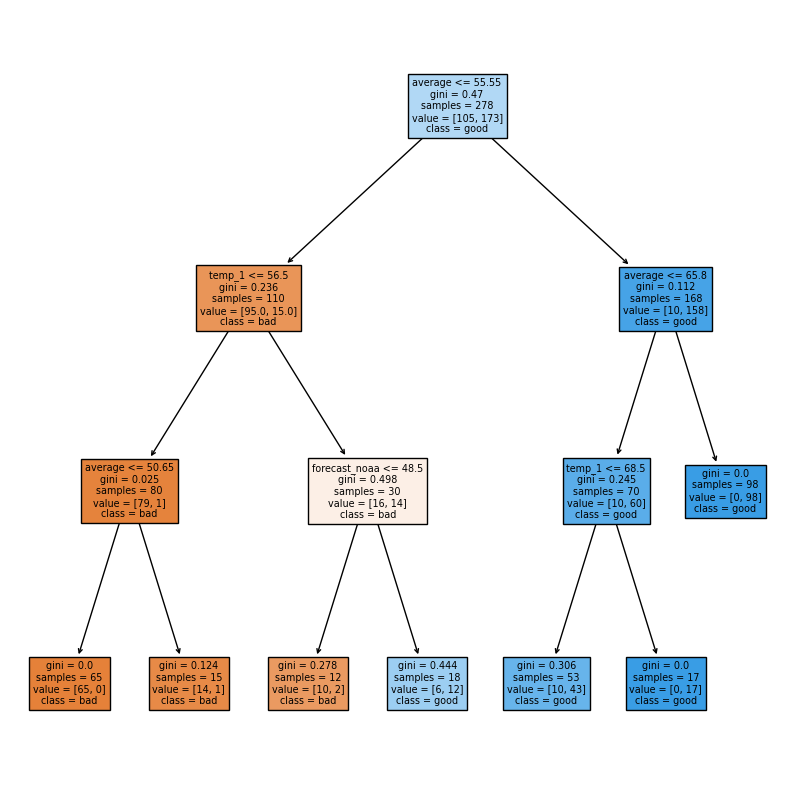

In [85]:
plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(tree_clf2,
               feature_names=list(X),
               class_names=['bad', 'good'],
               filled = True);

In [86]:
pred = tree_clf2.predict(x_test)

print(tree_clf2.score(x_test,y_clas_test))

0.8714285714285714


### 13. Construye un nuevo modelo `RandomForestClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.